Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

Importing The Dataset

In [2]:
Data = pd.read_csv('data.txt',header=None)     #Data stored as DataFrame

In [4]:
#Visualising The Top 5 Data
Data.head()

,0
0,hindi movies for adults
1,are panda dogs real
2,asuedraw winning numbers
3,sentry replacement keys
4,rebuilding nicad battery packs


In [5]:
#Visualising The last 5 Data
Data.tail()

,0
9988,sjogren syndrome pictures
9989,how do you renew a passport
9990,medellin dim
9991,concursos funcab
9992,jogo de cidades


In [6]:
#Giving Name To Index of DataFrame
Data.index.name= 'Sr No.'   

In [7]:
#Renaming Column Named 0 to Sentences
Data.rename(columns={0:'Sentences'},inplace=True)   

In [10]:
#Getting Info About The Dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentences  9993 non-null   object
dtypes: object(1)
memory usage: 78.2+ KB


In [11]:
Data

,Sentences
Sr No.,
0,hindi movies for adults
1,are panda dogs real
2,asuedraw winning numbers
3,sentry replacement keys
4,rebuilding nicad battery packs
...,...
9988,sjogren syndrome pictures
9989,how do you renew a passport
9990,medellin dim


Code Tagging A Sentence as Yes / No w.r.t To It Being A Question

In [13]:
thisset = {'what','when','how','where','am','is','are','which','who','whom','whose','why'}  #list of question words

arr = []                       #Empty list to contain tag of each sentence.

for i in range (0,Data.shape[0]):
 sentence= Data.Sentences[i]      #Collecting sentence for each ith row
 i=0
 temp = ""                     #Temp string to colect each single word of sentence and check for its presence in thisset.
 identifier = 1                #identifier used to check for sentence not as a question.
 while(i<len(sentence)):
    while(i<len(sentence) and sentence[i]!=' '):
        temp+=sentence[i]
        i+=1
    i+=1
    if(temp in thisset):
        arr.append(1)         #appending 1 to arr to signify its a question.
        identifier=0          #If the sentence is a question, setting identifier=0.
        break
    temp = ""                 #Emptying the temp array to store next word of the sentence.
 if identifier ==1:
   arr.append(0)              #when identifier=1, it signifies the sentence is not a question, so appending 0 to arr
print(arr)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

In [15]:
#Adding new column to the DataFrame to represent boolean for Question(1) / not Question(0)
Data['Boolean_result']=arr 
Data

,Sentences,Boolean_result
Sr No.,,
0,hindi movies for adults,0
1,are panda dogs real,1
2,asuedraw winning numbers,0
3,sentry replacement keys,0
4,rebuilding nicad battery packs,0
...,...,...
9988,sjogren syndrome pictures,0
9989,how do you renew a passport,1
9990,medellin dim,0


In [16]:
#Adding a new tag column stating Yes / No
Data['Tag']= Data['Boolean_result'].map({0:'NO',1:'YES'})   #using map function to get tag {0:no , 1:yes}
Data

,Sentences,Boolean_result,Tag
Sr No.,,,
0,hindi movies for adults,0,NO
1,are panda dogs real,1,YES
2,asuedraw winning numbers,0,NO
3,sentry replacement keys,0,NO
4,rebuilding nicad battery packs,0,NO
...,...,...,...
9988,sjogren syndrome pictures,0,NO
9989,how do you renew a passport,1,YES
9990,medellin dim,0,NO


Visualizing The Results

NO     9010
YES     983
Name: Tag, dtype: int64


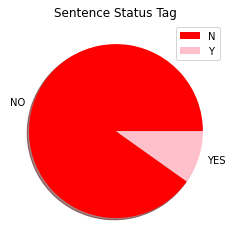

In [17]:
import matplotlib.pyplot as plt
Sentence_data= Data.Tag.value_counts()
print(Sentence_data)

#Visualization
plt.pie(Sentence_data,labels=['NO','YES'],colors=['red','pink'],shadow=True)
plt.title('Sentence Status Tag')
plt.legend('NY')
plt.show()

Storing Output In An Excel File

In [18]:
Data.to_excel('Question_Status_Tag.xlsx')